# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATA


In [2]:
df = pd.read_csv("diabetes-2-1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATA PREPROCESSING

# 1. Visualising the data and checking for missing values


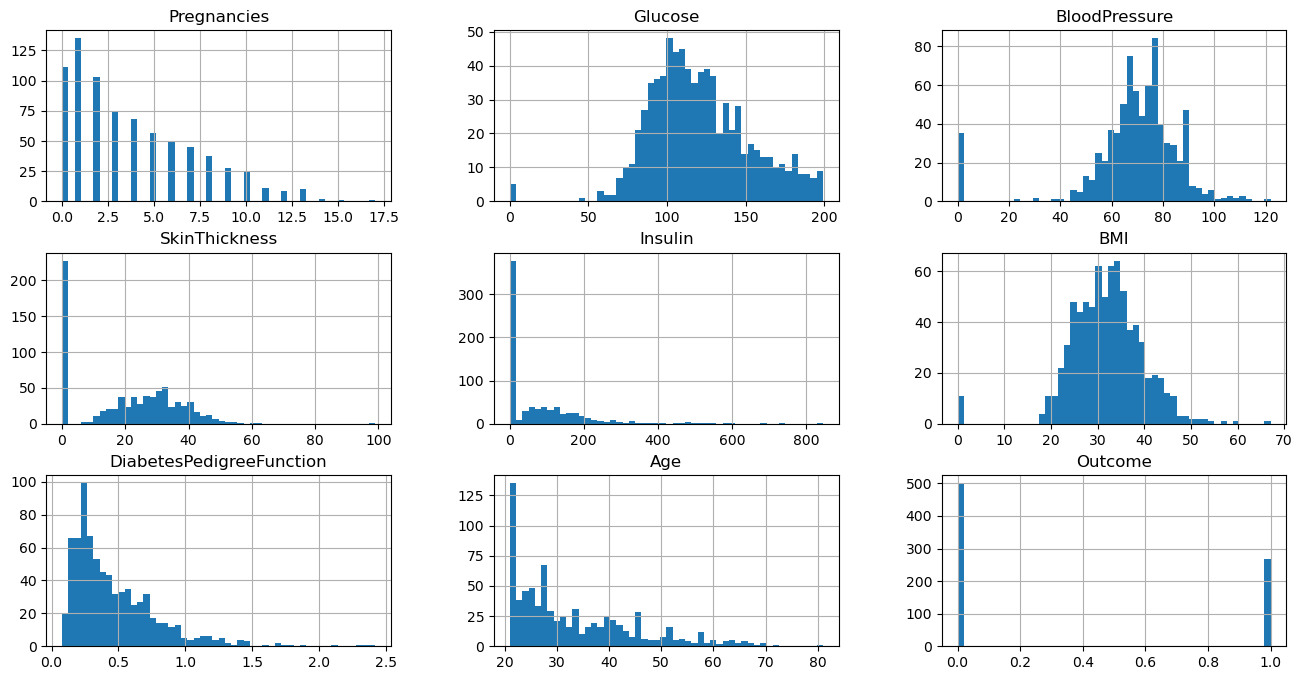

In [3]:
df.hist(bins = 50 , figsize=(16,8))
plt.show()

# from the above plot we observe that zeros are present in data, where it should have a specific value.

# 3. Finding number of missing values in each feature. And replacing them





In [4]:
# from visulization we know that we have zero as our missing values. let use eq() to find them.
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# from out[5] we have features which have missing values.let's select the features for which we need to replace with its mean. pregnancies can be zero if the data is collected from male patients. features like glucose, Bloodpressure,skinthickness,insulin, bmi should have some value.


In [5]:
#let's replace zero values with mean, with help of impute function.
#We will be applying this impute function to a sepcific features like['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 0 , strategy = 'mean')
imputer.fit(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [7]:
#checking for missing values
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

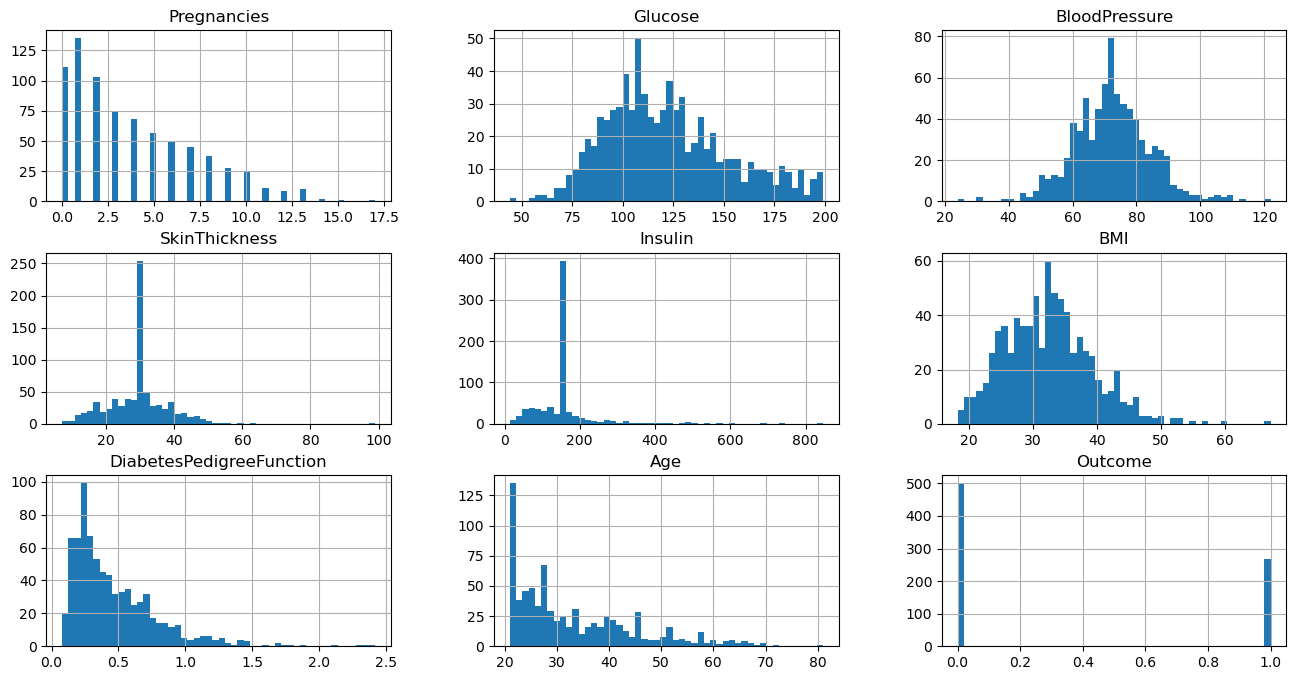

In [8]:
df.hist(bins = 50 , figsize=(16,8))
plt.show()

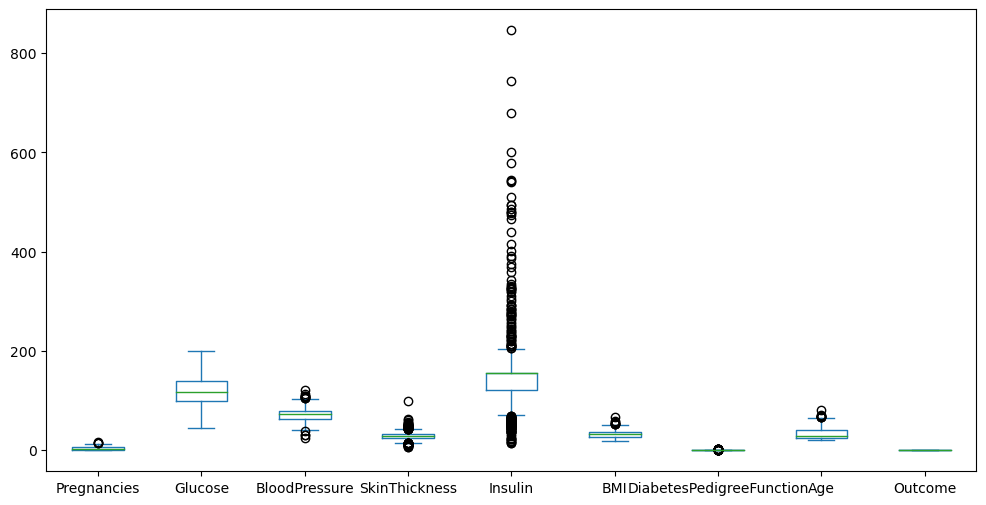

In [9]:
#let's visualize the data again with a boxplot
df.plot(kind = 'box',  layout = (3,3), figsize=(12,6))
plt.show()


C:\Users\chaitanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


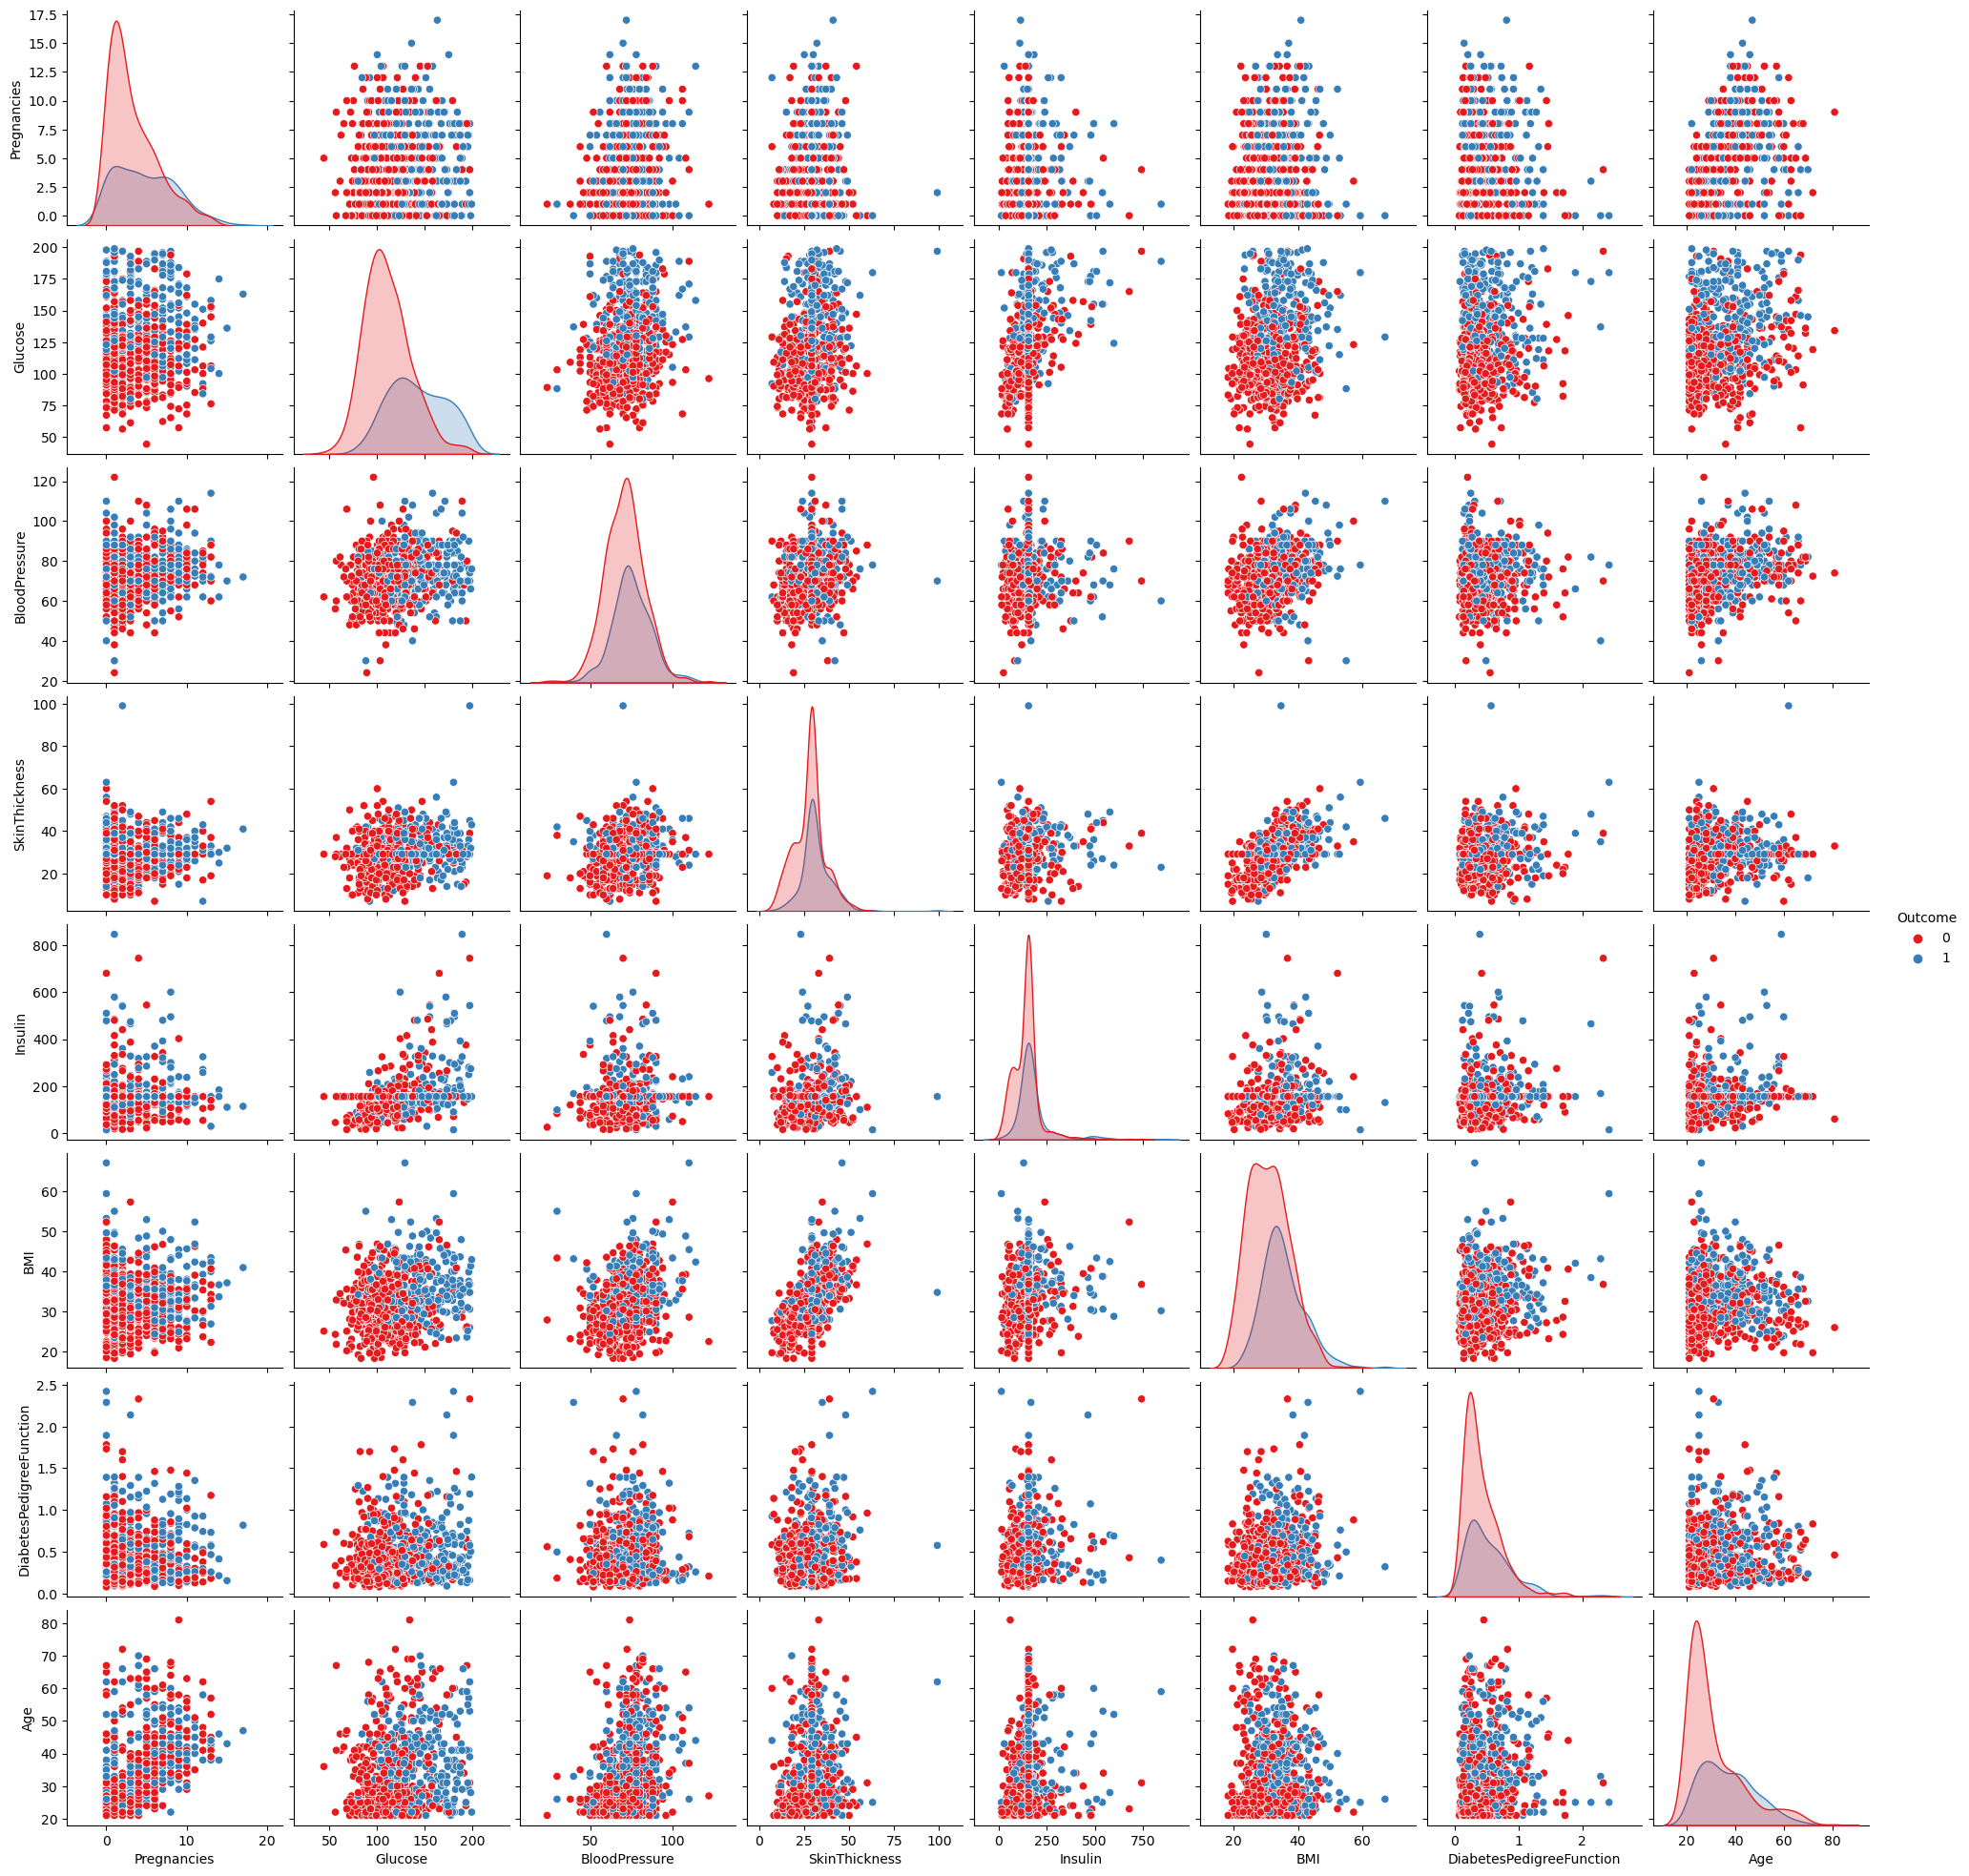

In [10]:
sns.pairplot(df,hue = 'Outcome',palette = 'Set1')

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


strong correlations:
 1.age X pregnancies (0.54)
 2.insulin X glucose (0.42)
 3.glucose X outcome (0.49)
 4.skin thickness X Bmi (0.54)
Negative correlations:
1.DPF x pregnancies (-0.033)
2.bloodpressure X DPF(-0.00276)
  
 

<Axes: >

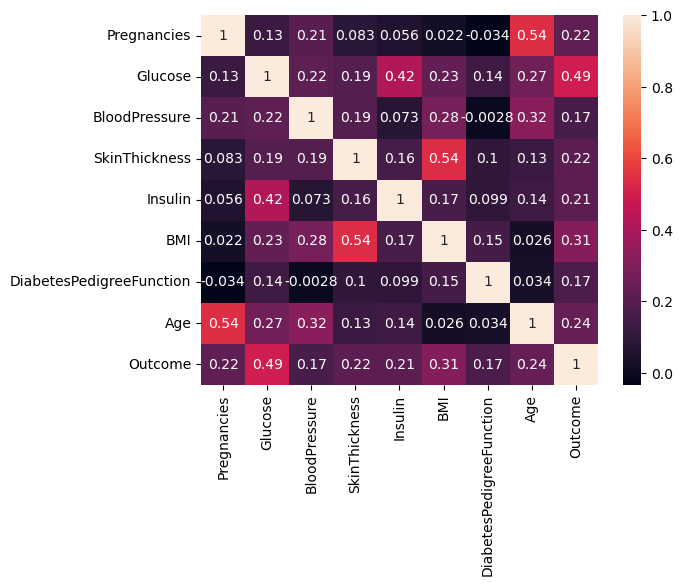

In [12]:
sns.heatmap(df.corr(), annot = True)

# 4. Feature scaling the data.

In [13]:
# first we will separate the dependent data and independent data
X = df.iloc[:,:-1]
X
# X is our independent data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [14]:
Y = df.iloc[:,-1]
Y
# Y will be our dependent data as it depends on X data features

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Spliting the data into x_train,y_train,x_test,y_test

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.000000,29.00000,126.000000,35.200000,0.692,54
118,4,97.0,60.000000,23.00000,155.548223,28.200000,0.443,22
247,0,165.0,90.000000,33.00000,680.000000,52.300000,0.427,23
157,1,109.0,56.000000,21.00000,135.000000,25.200000,0.833,23
468,8,120.0,72.405184,29.15342,155.548223,30.000000,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.000000,48.00000,180.000000,32.900000,0.171,63
192,7,159.0,66.000000,29.15342,155.548223,30.400000,0.383,36
629,4,94.0,65.000000,22.00000,155.548223,24.700000,0.148,21
559,11,85.0,74.000000,29.15342,155.548223,30.100000,0.300,35


In [16]:
# with help of StandardScaler function, we will standardize the values present in X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Applying Machine learning models

# 1. SVM Model

In [17]:
# from sklearn we will import svc
# cl_svm is our classifier with kernel as rbf 
# training the model with x_train and y_train
from sklearn.svm import SVC
cl_svm = SVC(kernel = 'rbf',probability = True)
cl_svm.fit(x_train,y_train)

SVC(probability=True)

In [18]:
# testing our model with x_test data.
# 'p' will be our output
SVM_pred = cl_svm.predict(x_test)
SVM_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

accuracy: 0.7727272727272727
confusion_matrix:
 [[94 13]
 [22 25]]
specificity 0.8785046728971962
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.66      0.53      0.59        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154



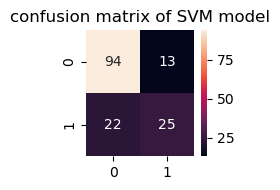

In [55]:
# checking model accuracy and confusion martix, classification report
from sklearn.metrics import accuracy_score, confusion_matrix  , classification_report
SVM_ACC = accuracy_score(y_test,SVM_pred)

print('accuracy:',SVM_ACC)
print('confusion_matrix:\n',confusion_matrix(y_test,SVM_pred))

tn,fp,fn,tp = confusion_matrix(y_test,SVM_pred).ravel()

specificity = tn/(tn+fp)

print('specificity',specificity)


SVM_report = classification_report(y_test,SVM_pred)
print('classification_report:\n',SVM_report)

plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(y_test,SVM_pred),annot = True)

plt.title('confusion matrix of SVM model')
plt.tight_layout()
plt.show()

# 2.Logistic regression

In [20]:
#from sklearn linear model we will import logistic regression
#cl_logR will be our classifier for logistic regression
# fitting x_train and y_train data for training
from sklearn.linear_model import LogisticRegression
cl_logR = LogisticRegression()
cl_logR.fit(x_train,y_train)      

LogisticRegression()

In [21]:
# predicting the values with predict function using x_test data
LR_pred = cl_logR.predict(x_test)
LR_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

accuracy: 0.8116883116883117
confusion_matrix:
 [[97 10]
 [19 28]]
specificity 0.9065420560747663
classification_report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



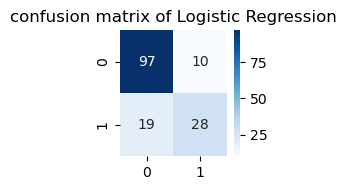

In [56]:
# checking model accuracy and confusion martix, classification report
LR_ACC = accuracy_score(y_test,LR_pred)
print('accuracy:',LR_ACC)
print('confusion_matrix:\n',confusion_matrix(y_test, LR_pred))

tn,fp,fn,tp = confusion_matrix(y_test, LR_pred).ravel()

specificity_lr = tn/(tn+fp)

print('specificity',specificity_lr)

LR_report = classification_report(y_test,LR_pred)
print('classification_report:\n',LR_report)

plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(y_test, LR_pred),annot = True,cmap = 'Blues')

plt.title('confusion matrix of Logistic Regression')
plt.tight_layout()
plt.show()


# 3.Naive Bayes model

In [23]:
#from sklearn naive_bayes we will import GaussianNB
#cl_NB will be our classifier for GaussianNB
# fitting x_train and y_train data for training
from sklearn.naive_bayes import GaussianNB
cl_NB = GaussianNB()
cl_NB.fit(x_train,y_train)

GaussianNB()

In [24]:
# predicting the values with predict function using x_test data
NB_pred = cl_NB.predict(x_test)
NB_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

accuracy: 0.7857142857142857
confusion_matrix:
 [[92 15]
 [18 29]]
specificity 0.8598130841121495
classification_report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



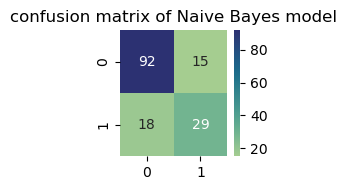

In [57]:
# checking model accuracy and confusion martix, classification report
NB_ACC = accuracy_score(y_test,NB_pred)
print('accuracy:',NB_ACC)
print('confusion_matrix:\n',confusion_matrix(y_test, NB_pred))

tn,fp,fn,tp = confusion_matrix(y_test, NB_pred).ravel()

specificity_NB = tn/(tn+fp)

print('specificity',specificity_NB)


NB_report = classification_report(y_test,NB_pred)
print('classification_report:\n',NB_report)

plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(y_test, NB_pred),annot = True,cmap = 'crest')

plt.title('confusion matrix of Naive Bayes model')
plt.tight_layout()
plt.show()


# 4. KNN model

In [26]:
#from sklearn neighbors we will import KNeighborsClassifier
#cl_KNN will be our classifier for KNeighborsClassifier
# fitting x_train and y_train data for training
from sklearn.neighbors import KNeighborsClassifier
cl_KNN = KNeighborsClassifier(n_neighbors = 36)
cl_KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=36)

In [27]:
# predicting the values with predict function using x_test data
KNN_pred = cl_KNN.predict(x_test)
KNN_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

accuracy: 0.7987012987012987
confusion_matrix:
 [[97 10]
 [21 26]]
specificity 0.9065420560747663
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



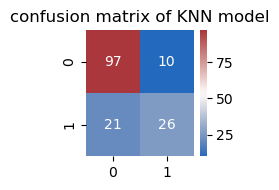

In [60]:
# checking model accuracy and confusion martix, classification report
KNN_ACC = accuracy_score(y_test,KNN_pred)
print('accuracy:',KNN_ACC)
print('confusion_matrix:\n',confusion_matrix(y_test, KNN_pred))

tn,fp,fn,tp = confusion_matrix(y_test, KNN_pred).ravel()

specificity_KNN = tn/(tn+fp)

print('specificity',specificity_KNN)


KNN_report = classification_report(y_test,KNN_pred)
print('classification_report:\n',KNN_report)

plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(y_test, KNN_pred),annot = True,cmap = 'vlag')

plt.title('confusion matrix of KNN model')
plt.tight_layout()
plt.show()

# 5.Random Forest classifier 

In [29]:
#from sklearn ensemble we will import RandomForestClassifier
#cl_RFC will be our classifier for RandomForestClassifier
# fitting x_train and y_train data for training
from sklearn.ensemble import RandomForestClassifier
cl_RFC = RandomForestClassifier(n_estimators= 300)
cl_RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [30]:
# predicting the values with predict function using x_test data
RFC_pred = cl_RFC.predict(x_test)
RFC_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

accuracy: 0.8051948051948052
confusion_matrix:
 [[93 14]
 [16 31]]
specificity 0.8691588785046729
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



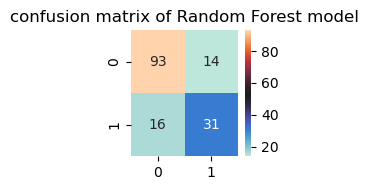

In [59]:
# checking model accuracy and confusion martix, classification report

RFC_ACC = accuracy_score(y_test,RFC_pred)
print('accuracy:',RFC_ACC)
print('confusion_matrix:\n',confusion_matrix(y_test, RFC_pred))

tn,fp,fn,tp = confusion_matrix(y_test, RFC_pred).ravel()

specificity_RFC = tn/(tn+fp)

print('specificity',specificity_RFC)



RFC_report = classification_report(y_test,RFC_pred)
print('classification_report:\n',RFC_report)

plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(y_test, RFC_pred),annot = True,cmap = 'icefire')

plt.title('confusion matrix of Random Forest model')
plt.tight_layout()
plt.show()

# Comparative analysis

In [32]:
#Taking the accuracy score of all models and creating a new dataframe.
results = pd.DataFrame({'MODEL':['SVM','LOGISTIC_REGRESSION','NAIVE_BAYES','KNN','RANDOM_FOREST'],
                        'ACCURACY_SCORE':[SVM_ACC,LR_ACC,NB_ACC,KNN_ACC,RFC_ACC]})
results = results.sort_values(by = 'ACCURACY_SCORE',ascending = True)
results.set_index('MODEL')

,ACCURACY_SCORE
MODEL,
SVM,0.772727
NAIVE_BAYES,0.785714
KNN,0.798701
RANDOM_FOREST,0.805195
LOGISTIC_REGRESSION,0.811688


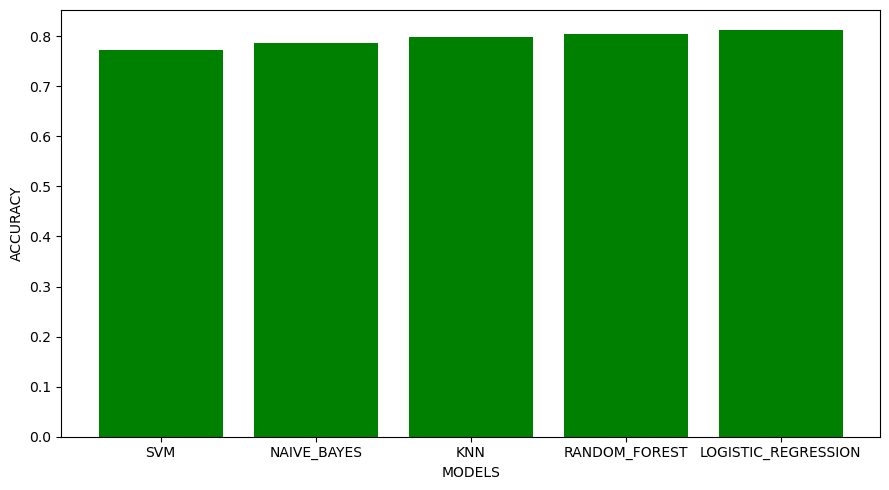

In [33]:
#plotting the accuracy of all models.
plt.figure(figsize = (9,5))
plt.bar(results['MODEL'], results['ACCURACY_SCORE'], color='green')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')

plt.tight_layout()
plt.show()

In [34]:
#importing performance metrics roc_curve and roc_auc_score
from sklearn.metrics import roc_curve,roc_auc_score

In [35]:
# predicting the probability of positve cases for all models with help of .predict proba
RFC_proba1 = cl_RFC.predict_proba(x_test)[:,1]
KNN_proba2 = cl_KNN.predict_proba(x_test)[:,1]
NB_proba3 = cl_NB.predict_proba(x_test)[:,1]
LR_proba4 = cl_logR.predict_proba(x_test)[:,1]
SVM_proba5 = cl_svm.predict_proba(x_test)[:,1]

In [36]:
# Getting true posititve rates and false positive rates and thresholds for all models.
fpr1,tpr1,t1 = roc_curve(y_test,RFC_proba1)
fpr2,tpr2,t2 = roc_curve(y_test,KNN_proba2)
fpr3,tpr3,t3 = roc_curve(y_test,NB_proba3)
fpr4,tpr4,t4 = roc_curve(y_test,LR_proba4)
fpr5,tpr5,t5 = roc_curve(y_test,SVM_proba5)

In [37]:
# Getting roc_auc_score for models
rfc_auc = roc_auc_score(y_test,RFC_proba1)
KNN_auc = roc_auc_score(y_test,KNN_proba2)
NB_auc = roc_auc_score(y_test,NB_proba3)
LR_auc = roc_auc_score(y_test,LR_proba4)
svm_auc = roc_auc_score(y_test,SVM_proba5)

In [38]:
report_auc_score = pd.DataFrame({'MODEL':['SVM','LOGISTIC_RGRESSION','NAIVE_BAYES','KNN','RANDOM_FOREST'],
                        'Auc_SCORE':[svm_auc,LR_auc,NB_auc,KNN_auc,rfc_auc]})
report_auc_score = report_auc_score.sort_values(by = 'Auc_SCORE',ascending = True)
report_auc_score.set_index('MODEL')

,Auc_SCORE
MODEL,
SVM,0.855438
RANDOM_FOREST,0.861802
NAIVE_BAYES,0.863193
LOGISTIC_RGRESSION,0.875522
KNN,0.876417


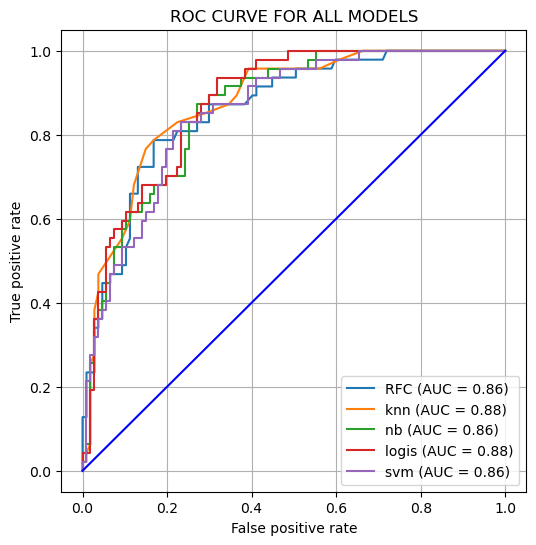

In [61]:
#plotting roc curve with the tpr and fpr values for all models
plt.figure(figsize = (6,6))
plt.plot(fpr1,tpr1, label = 'RFC (AUC = {:.2f})'.format(rfc_auc))
plt.plot(fpr2,tpr2, label = 'knn (AUC = {:.2f})'.format(KNN_auc))
plt.plot(fpr3,tpr3, label = 'nb (AUC = {:.2f})'.format(NB_auc))
plt.plot(fpr4,tpr4, label = 'logis (AUC = {:.2f})'.format(LR_auc))
plt.plot(fpr5,tpr5, label = 'svm (AUC = {:.2f})'.format(svm_auc))

plt.plot([0,1],[0,1], color = 'blue')
plt.title('ROC CURVE FOR ALL MODELS')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)
plt.legend()
plt.show()